# Példa 6.2

Egy $L=1 \,\rm{m}$ hosszú, $d=10 \,\rm{mm}$ átmérőjű egyenes rúd végein $F=1 \,\rm{kN}$ húzóerő, $M_{1}$ hajlítónyomaték és $M_{2}$ csavarónyomaték működik. Hogyan válasszuk meg az $M_{1}/F$ ill. $M_{2}/F$ arányt, ha azt akarjuk, hogy az egyes terhelések hatására azonos mértékű alakváltozási energia halmozódjon fel a rúdban? Mekkora lesz ebben az esetben (amikor mindhárom igénybevétel működik) a teljes alakváltozási energia?

Adatok: 
$E=200 \,\rm{GPa}$, $\nu=0,3$.

# Megoldás

Szükségünk lesz a `sympy` modulra és a különböző mennyiségek szimbólmaira. A keresztmetszet területe és másodrendű nyomatéka az átmérőből számolható. A nyírási rugalmassági modulus a rugalmassági modulus és a Poisson tényező segítségével határozható meg.

In [1]:
import sympy as sp
sp.init_printing()

L, d, F, M1, M2, E, ν, x = sp.symbols("L, d, F, M1, M2, E, ν, x")
A = d**2*sp.pi/4
I = d**4*sp.pi/64
Ip = d**4*sp.pi/32
G = E/(2*(1+ν))

Megadjuk az adatokat egy listában, hogy egyszerűen behelyettesíthessünk a későbbiekben. Térjünk át a mm-kN-MPa mértékegységekre!

In [2]:
L_adat = 1000 #mm
d_adat = 10 #mm
F_adat = 1 #kN
E_adat = 200000 #MPa
ν_adat = 0.3 #1
adatok = [(L,L_adat),(d,d_adat),(F,F_adat),(E,E_adat),(ν,ν_adat)]

A `sympy`-ban az $\int_{a}^{b} f(x) \mathrm{d}x$ határozott integrált `integrate(f, (x, a, b))` szintaktikával tudjuk megadni.

Normál igénybevétel esetén:

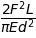

In [3]:
U_N = sp.integrate(F**2/(2*A*E),(x,0,L))
U_N

#### Hajlítás esetén:

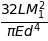

In [4]:
U_Mh = sp.integrate(M1**2/(2*I*E),(x,0,L))
U_Mh

Azonos alakváltozási energia esetén: $U_N=U_{Mh}$. Ezt az egyenletet a `sympy`-ban 0-ra rendezve kell megadnunk. Az $M_1/F$ arányt közvetlenül nem tudjuk megkapni, viszont kifejezhetjük $M_1$-t $F$-el.

In [5]:
egyenlet1 = U_N-U_Mh
megoldas1 = sp.solve(egyenlet1, M1) #az egyenlet megoldása M1 hajlítónyomatékra
megoldas1

Ebből kifejezhető:
$$\frac{M_1}{F}=\pm \frac {d}{4}.$$

A $\pm$ előjelnek nagy jelentősége nincsen, mivel az alakváltozási energiák számításakor mind $F$, mind $M_1$ négyzetre van emelve.

#### Csavarás esetén:

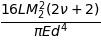

In [6]:
U_Mt = sp.integrate(M2**2/(2*Ip*G),(x,0,L))
U_Mt

Az előzőekhez hasonlóan az $U_N=U_{Mt}$ egyenletet 0-ra rendezve kell megadnunk. Kifejezzük $M_2$-t $F$-el.

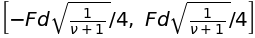

In [7]:
egyenlet2 = U_N-U_Mt
megoldas2 = sp.solve(egyenlet2, M2) #az egyenlet megoldása M2 csavarónyomatékra
megoldas2

Ebből kifejezhető:
$$\frac{M_2}{F}=\pm \frac {d \sqrt{\frac{1}{\nu+1}}}{4}.$$

A $\pm$ előjelnek nagy jelentősége itt sincsen, mivel az alakváltozási energiák számításakor mind $F$, mind $M_2$ négyzetre van emelve.

#### Teljes alakváltozási energia:
Mivel a $U_N=U_{Mh}=U_{Mt}$, ezért a teljles alakváltozási energia $3U_N$-ként is számítható. Az eredmény mértékegysége kNm (=kJ) lesz.

In [10]:
3*U_N.subs(adatok).evalf(5) #kJ